In [1207]:
import pandas as pd
data = pd.read_csv('breast_cancer_data.csv')
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [1208]:
data.shape

(386, 10)

In [1209]:
data.size

3860

In [1210]:
data.info()
# since all of the columns are categorical, the datatypes must be changed to "category" instead of "object", which will be done later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB


In [1211]:
data.isnull().sum()
# there are two columns with missing values

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [1212]:
data['tumor-size'] = data.groupby(['age'])['tumor-size'].transform(lambda x: x.fillna(x.mode()[0])) # fill missing values using mode

In [1213]:
data['inv-nodes'] = data.groupby(['age'])['inv-nodes'].transform(lambda x: x.fillna(x.mode()[0]))

In [1214]:
data.isnull().sum()
# missing values have been filled

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [1215]:
data.duplicated().sum()

11

In [1216]:
data.drop_duplicates(inplace=True, ignore_index=True)
data.duplicated().sum() # duplicated values have been removed

0

In [1217]:
data['class'] = data['class'].astype("category")
data['age'] = data['age'].astype("category")
data['menopause'] = data['menopause'].astype("category")
data['tumor-size'] = data['tumor-size'].astype("category")
data['inv-nodes'] = data['inv-nodes'].astype("category")
data['node-caps'] = data['node-caps'].astype("category")
data['deg-malig'] = data['deg-malig'].astype("category")
data['breast'] = data['breast'].astype("category")
data['breast-quad'] = data['breast-quad'].astype("category")
data['irradiat'] = data['irradiat'].astype("category")
data.info() # datatypes have been changed to categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        375 non-null    category
 1   age          375 non-null    category
 2   menopause    375 non-null    category
 3   tumor-size   375 non-null    category
 4   inv-nodes    375 non-null    category
 5   node-caps    375 non-null    category
 6   deg-malig    375 non-null    category
 7   breast       375 non-null    category
 8   breast-quad  375 non-null    category
 9   irradiat     375 non-null    category
dtypes: category(10)
memory usage: 5.9 KB


In [1218]:
data.describe()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
count,375,375,375,375,375,375,375,375,375,375
unique,2,6,3,11,7,4,3,2,7,2
top,no-recurrence-events,40-49,premeno,30-34,0-2,no,2,left,left_low,no
freq,254,114,211,83,234,266,161,190,137,293


In [1219]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

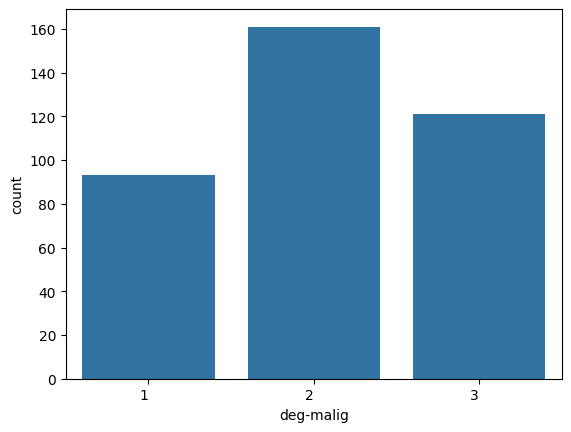

In [1220]:
sns.countplot(x=data['deg-malig'])
plt.xticks(ha='right')
plt.show
# we can see that the plot is slightly skewed left, indicating that the majority of the cancer cells are a higher grade of malignant - they are relatively abnormal

<Axes: xlabel='deg-malig'>

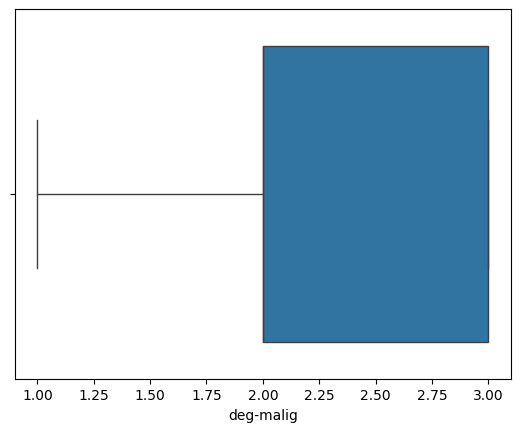

In [1221]:
sns.boxplot(data=data, x='deg-malig')
# this boxplot further confirms our observations

<function matplotlib.pyplot.show(close=None, block=None)>

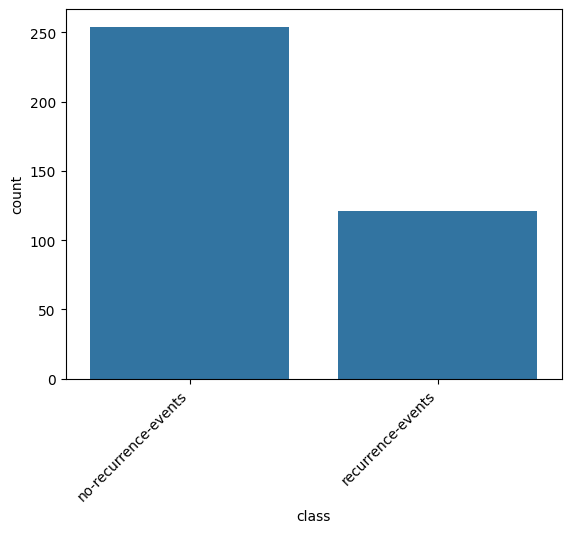

In [1222]:
sns.countplot(x=data['class'])
plt.xticks(rotation=45, ha='right')
plt.show
# we can observe that no-recurrence events occurred more than twice as much as recurrence events.

<function matplotlib.pyplot.show(close=None, block=None)>

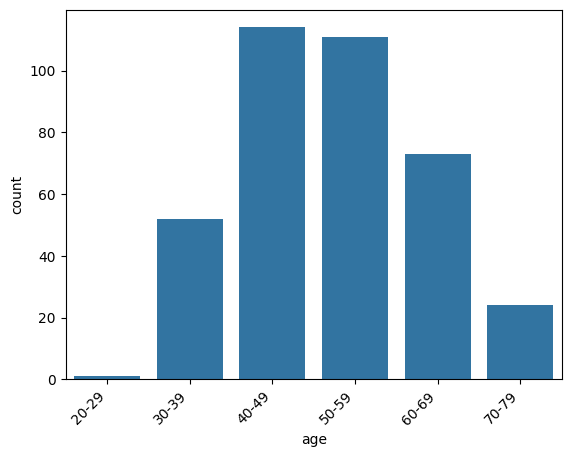

In [1223]:
sns.countplot(x=data['age'])
plt.xticks(rotation=45, ha='right')
plt.show
# this plot shows that the majority of patients with breast cancer are between the ages of 40-60 years of age.

<function matplotlib.pyplot.show(close=None, block=None)>

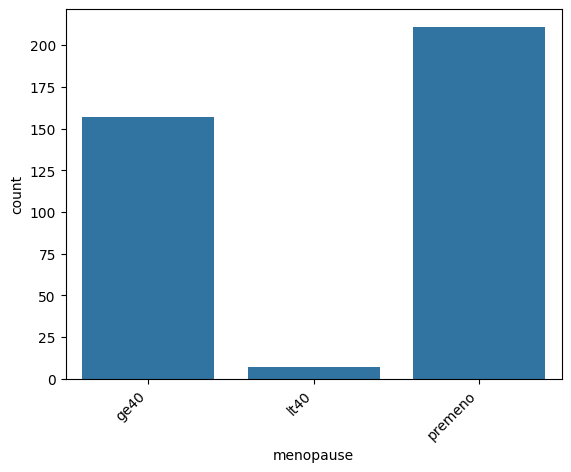

In [1224]:
sns.countplot(x=data['menopause'])
plt.xticks(rotation=45, ha='right')
plt.show
# the plot shows that the majority of patients with breast cancer are either premenopausal or above the age of 40. there are almost no cases where the patient is younger than 40 years of age.

<function matplotlib.pyplot.show(close=None, block=None)>

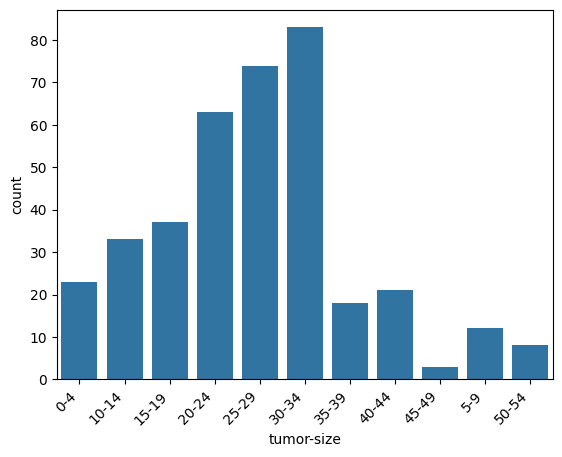

In [1225]:
sns.countplot(x=data['tumor-size'])
plt.xticks(rotation=45, ha='right')
plt.show
# we can see that the majority of observed tumor sizes are between 20-34.

<function matplotlib.pyplot.show(close=None, block=None)>

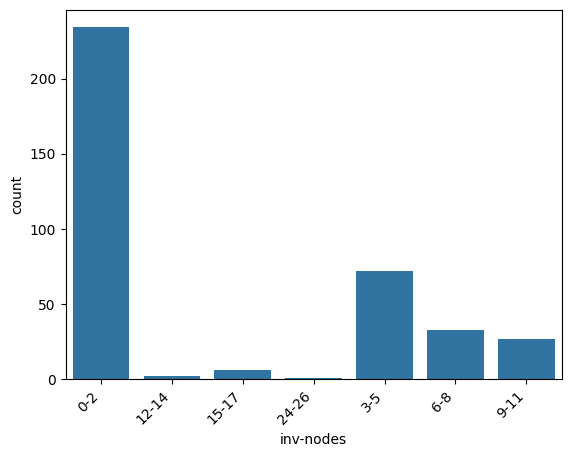

In [1226]:
sns.countplot(x=data['inv-nodes'])
plt.xticks(rotation=45, ha='right')
plt.show
# the majority of cases indicate cancer in 0-2 nodes, though some instances show a higher number of affected nodes.

<function matplotlib.pyplot.show(close=None, block=None)>

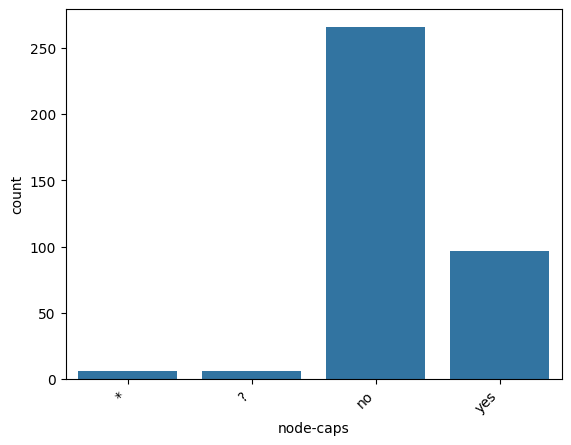

In [1227]:
sns.countplot(x=data['node-caps'])
plt.xticks(rotation=45, ha='right')
plt.show
# most cases show that the patient does not have node caps. there are also a few cases where the answer is unknown and is labeled by a symbol.

<function matplotlib.pyplot.show(close=None, block=None)>

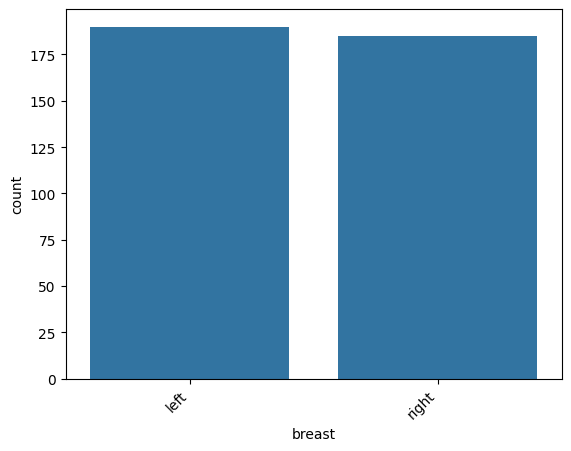

In [1228]:
sns.countplot(x=data['breast'])
plt.xticks(rotation=45, ha='right')
plt.show
# the number of cases for the left breast and the number for the right breast are almost equal.

<function matplotlib.pyplot.show(close=None, block=None)>

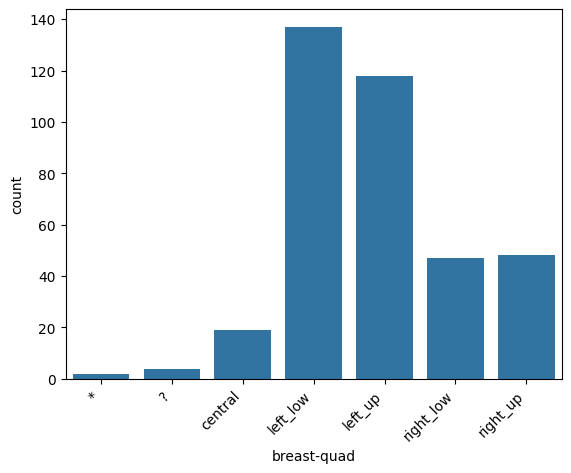

In [1229]:
sns.countplot(x=data['breast-quad'])
plt.xticks(rotation=45, ha='right')
plt.show
# the majority of cases lie within the left quadrants of the breast.

<function matplotlib.pyplot.show(close=None, block=None)>

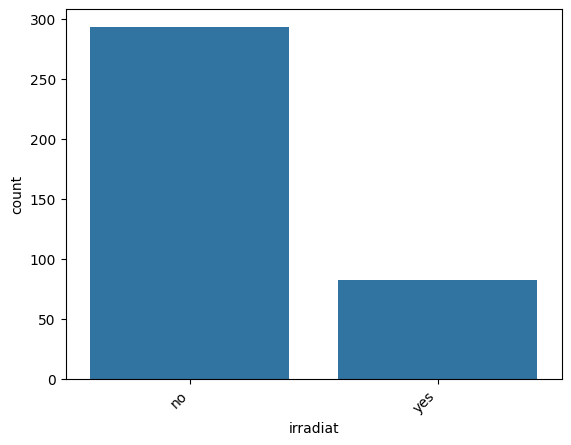

In [1230]:
sns.countplot(x=data['irradiat'])
plt.xticks(rotation=45, ha='right')
plt.show
# the plot shows that most cases have not been treated with radiation therapy.

In [1231]:
data = pd.get_dummies(data, columns=["class"], drop_first=True)
data = pd.get_dummies(data, columns=["age"], drop_first=True)
data = pd.get_dummies(data, columns=["menopause"], drop_first=True)
data = pd.get_dummies(data, columns=["tumor-size"], drop_first=True)
data = pd.get_dummies(data, columns=["inv-nodes"], drop_first=True)
data = pd.get_dummies(data, columns=["deg-malig"], drop_first=True)
data = pd.get_dummies(data, columns=["node-caps"], drop_first=True)
data = pd.get_dummies(data, columns=["breast"], drop_first=True)
data = pd.get_dummies(data, columns=["breast-quad"], drop_first=True)
data = pd.get_dummies(data, columns=["irradiat"], drop_first=True)

data.info()

# used one-hot encoding to prepare the variables for training

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   class_recurrence-events  375 non-null    bool 
 1   age_30-39                375 non-null    bool 
 2   age_40-49                375 non-null    bool 
 3   age_50-59                375 non-null    bool 
 4   age_60-69                375 non-null    bool 
 5   age_70-79                375 non-null    bool 
 6   menopause_lt40           375 non-null    bool 
 7   menopause_premeno        375 non-null    bool 
 8   tumor-size_10-14         375 non-null    bool 
 9   tumor-size_15-19         375 non-null    bool 
 10  tumor-size_20-24         375 non-null    bool 
 11  tumor-size_25-29         375 non-null    bool 
 12  tumor-size_30-34         375 non-null    bool 
 13  tumor-size_35-39         375 non-null    bool 
 14  tumor-size_40-44         375 non-null    bool 
 15  tumor-

In [1232]:
print(data.columns)

Index(['class_recurrence-events', 'age_30-39', 'age_40-49', 'age_50-59',
       'age_60-69', 'age_70-79', 'menopause_lt40', 'menopause_premeno',
       'tumor-size_10-14', 'tumor-size_15-19', 'tumor-size_20-24',
       'tumor-size_25-29', 'tumor-size_30-34', 'tumor-size_35-39',
       'tumor-size_40-44', 'tumor-size_45-49', 'tumor-size_5-9',
       'tumor-size_50-54', 'inv-nodes_12-14', 'inv-nodes_15-17',
       'inv-nodes_24-26', 'inv-nodes_3-5', 'inv-nodes_6-8', 'inv-nodes_9-11',
       'deg-malig_2', 'deg-malig_3', 'node-caps_?', 'node-caps_no',
       'node-caps_yes', 'breast_right', 'breast-quad_?', 'breast-quad_central',
       'breast-quad_left_low', 'breast-quad_left_up', 'breast-quad_right_low',
       'breast-quad_right_up', 'irradiat_yes'],
      dtype='object')


In [1233]:
from sklearn.model_selection import train_test_split
X = data.drop('class_recurrence-events',axis=1)
y = data['class_recurrence-events']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [1234]:
# Linear classifier

from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="perceptron", alpha=0.01)
clf.fit(X_train, y_train)

SGDClassifier(alpha=0.01, loss='perceptron')

In [1235]:
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
accuracy_train = accuracy_score(y_train, clf.predict(X_train))
recall_test = recall_score(y_test, clf.predict(X_test))
recall_train = recall_score(y_train, clf.predict(X_train))
precision_test = precision_score(y_test, clf.predict(X_test))
precision_train = precision_score(y_train, clf.predict(X_train))
f1_test = f1_score(y_test, clf.predict(X_test))
f1_train = f1_score(y_train, clf.predict(X_train))

print(f'Accuracy on test data: {accuracy_test:.2f}')
print(f'Accuracy on train data: {accuracy_train:.2f}')
print(f'Recall on test: {recall_test:.2f}, Recall on train: {recall_train:.2f}')
print(f'Precision on test: {precision_test:.2f}, Precision on train: {precision_train:.2f}')
print(f'F1-score on test: {f1_test:.2f}, F1-score on train: {f1_train:.2f}')

Accuracy on test data: 0.50
Accuracy on train data: 0.61
Recall on test: 0.61, Recall on train: 0.67
Precision on test: 0.34, Precision on train: 0.43
F1-score on test: 0.44, F1-score on train: 0.53


In [1236]:
# K-Nearest Neighbor Classifier

from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)

# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1237]:
accuracy_test = accuracy_score(y_test, knn.predict(X_test))
accuracy_train = accuracy_score(y_train, knn.predict(X_train))
recall_test = recall_score(y_test, knn.predict(X_test))
recall_train = recall_score(y_train, knn.predict(X_train))
precision_test = precision_score(y_test, knn.predict(X_test))
precision_train = precision_score(y_train, knn.predict(X_train))
f1_test = f1_score(y_test, knn.predict(X_test))
f1_train = f1_score(y_train, knn.predict(X_train))

print(f'Accuracy of KNN on test data: {accuracy_test:.2f}')
print(f'Accuracy of KNN on train data: {accuracy_train:.2f}')
print(f'Recall on test: {recall_test:.2f}, Recall on train: {recall_train:.2f}')
print(f'Precision on test: {precision_test:.2f}, Precision on train: {precision_train:.2f}')
print(f'F1-score on test: {f1_test:.2f}, F1-score on train: {f1_train:.2f}')

Accuracy of KNN on test data: 0.62
Accuracy of KNN on train data: 0.77
Recall on test: 0.28, Recall on train: 0.49
Precision on test: 0.37, Precision on train: 0.71
F1-score on test: 0.32, F1-score on train: 0.58


In [1238]:
import numpy as np
knn_search_accuracy = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}

In [1239]:
# K-Nearest Neighbor Classifier using Grid search CV

from sklearn.model_selection import GridSearchCV
knn_gscv = GridSearchCV(knn_search_accuracy, param_grid, cv=5)

In [1240]:
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [1241]:
knn_gscv.best_params_


{'n_neighbors': 17}

In [1242]:
best_knn = knn_gscv.best_estimator_

In [1243]:
knn_search_recall = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 100)}

knn_gscv2 = GridSearchCV(knn_search_recall, param_grid, cv=5)

knn_gscv2.fit(X_train, y_train)
knn_gscv2.best_params_

{'n_neighbors': 17}

In [1244]:
accuracy_test = accuracy_score(y_test, best_knn.predict(X_test))
accuracy_train = accuracy_score(y_train, best_knn.predict(X_train))
recall_test = recall_score(y_test, best_knn.predict(X_test))
recall_train = recall_score(y_train, best_knn.predict(X_train))
precision_test = precision_score(y_test, best_knn.predict(X_test))
precision_train = precision_score(y_train, best_knn.predict(X_train))
f1_test = f1_score(y_test, best_knn.predict(X_test))
f1_train = f1_score(y_train, best_knn.predict(X_train))

print(f'Accuracy of optimal KNN on test data: {accuracy_test:.2f}')
print(f'Accuracy of optimal KNN on train data: {accuracy_train:.2f}')
print(f'Recall on test: {recall_test:.2f}, Recall on train: {recall_train:.2f}')
print(f'Precision on test: {precision_test:.2f}, Precision on train: {precision_train:.2f}')
print(f'F1-score on test: {f1_test:.2f}, F1-score on train: {f1_train:.2f}')

Accuracy of optimal KNN on test data: 0.67
Accuracy of optimal KNN on train data: 0.69
Recall on test: 0.08, Recall on train: 0.12
Precision on test: 0.43, Precision on train: 0.67
F1-score on test: 0.14, F1-score on train: 0.20


In [1245]:
# The most important metric for this problem is recall because it is primarily impacted by false negatives which can be fatal in cases involving cancer.
# While false positives (precision) may lead to unnecessary concern and further testing, they do not pose a direct risk to the patient's life.